# Visualizacion con Matplotlib

In [4]:
# Impotamos las lbrerias necesarias
import numpy as np
import math as mt
from matplotlib import pyplot
import matplotlib.pyplot as plt
import pandas as pd
import requests
import os
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('seaborn-whitegrid')

Importamos datos desde archivos.

In [5]:
sun = np.loadtxt('Sunspots.txt').T
ano, nmanchas = np.reshape(sun[::2], (1, 300))[0], np.reshape(sun[1::2], (1,300))[0]
LLUVIA_2019 = pd.read_csv('201901010000Lluv.csv',encoding='latin-1')
TMAX_2019 = pd.read_csv('201901010000TMax.csv',encoding='latin-1')
TMIN_2019 = pd.read_csv('201901010000TMin.csv',encoding='latin-1')
TMED_2019 = pd.read_csv('201901010000TMed.csv',encoding='latin-1')
LLUVIA_2018 = pd.read_csv('201801010000Lluv.csv',encoding='latin-1')
TMAX_2018 = pd.read_csv('201801010000TMax.csv',encoding='latin-1')
TMIN_2018 = pd.read_csv('201801010000TMin.csv',encoding='latin-1')
TMED_2018 = pd.read_csv('201801010000TMed.csv',encoding='latin-1')

OSError: Sunspots.txt not found.

Unimos las bases de datos en una sola:

In [9]:
print(LLUVIA_2019.keys())

Index(['LON', 'LAT', 'EDO', 'CLAVE_SIH', 'NOMBRE', 'ENE'], dtype='object')


In [10]:
print(LLUVIA_2018.keys())

Index(['LON', 'LAT', 'ESTADO', 'CLAVE_SIH', 'NOMBRE', 'ENE'], dtype='object')


In [16]:
LLUVIA_2018 = LLUVIA_2018.rename(columns={'ESTADO':'EDO','ENE':'ENERO18'}) 
LLUVIA_2019 = LLUVIA_2019.rename(columns={'ENE':'ENERO19'})

In [17]:
print(LLUVIA_2019.keys())

Index(['LON', 'LAT', 'EDO', 'CLAVE_SIH', 'NOMBRE', 'ENERO19'], dtype='object')


In [18]:
print(LLUVIA_2018.keys())

Index(['LON', 'LAT', 'EDO', 'CLAVE_SIH', 'NOMBRE', 'ENERO18'], dtype='object')


In [19]:
print(TMAX_2018.keys())

Index(['Lon', 'Lat', 'Clave', 'Edo', 'Est', 'Tmax'], dtype='object')


In [20]:
print(TMAX_2019.keys())

Index(['Lon', 'Lat', 'Clave', 'Edo', 'Est', 'Tmax'], dtype='object')


In [21]:
print(TMIN_2018.keys())

Index(['Lon', 'Lat', 'Clave', 'Edo', 'Est', 'Tmin'], dtype='object')


In [22]:
print(TMIN_2019.keys())

Index(['Lon', 'Lat', 'Clave', 'Edo', 'Est', 'Tmin'], dtype='object')


In [23]:
print(TMED_2018.keys())

Index(['Lon', 'Lat', 'Clave', 'Edo', 'Est', 'Tmed'], dtype='object')


In [24]:
print(TMED_2019.keys())

Index(['Lon', 'Lat', 'Clave', 'Edo', 'Est', 'Tmed'], dtype='object')


In [3]:
TEMP18 = pd.merge(pd.merge(TMED_2018,TMAX_2018),TMIN_2018)
TEMP19 = pd.merge(pd.merge(TMED_2019,TMAX_2019),TMIN_2019)
TEMP = pd.concat([TEMP18, TEMP19], keys=['2018', '2019'],sort=False)[['Lon', 'Lat', 'Edo', 'Clave', 'Est', 'Tmed','Tmax','Tmin']]

In [27]:
TEMP

Lon    Lat    Edo         Clave  \
2018 0   -101.51  20.43    GTO         ABSGJ   
     1    -98.38  24.06  TAMPS         ABSTP   
     2   -116.90  32.44     BC         ALRBN   
     3    -97.97  20.17    PUE         ACJPB   
     4    -92.80  16.55   CHIS         ACACP   
     5   -100.71  20.03    GTO         ACNGJ   
     6    -99.75  16.76    GRO         76805   
     7    -99.90  16.84    GRO         ACAGR   
     8    -96.84  19.70    VER         ACAVC   
     9   -103.23  22.33    ZAC         ACHZC   
     10  -110.21  30.00    SON         ACNSO   
     11   -98.94  20.26    HGO         ACTHD   
     12   -96.58  19.49    VER         ACTVC   
     13  -108.70  25.70    SIN         ARCSI   
     14   -99.50  17.50    GRO         AERGR   
     15  -100.93  25.55   COAH         ARACL   
     16  -104.48  26.23    DGO         APRDR   
     17  -101.62  20.49    GTO         ATBGJ   
     18  -102.29  21.85    AGS         76571   
     19  -102.30  21.89    AGS         AGSAG   
     20  -104.07  25.26    DGO         AM2DR   
     21   -98.14  20.03    PUE         AHUPB   
     22   -97.41  19.45    PUE         ACHPB   
     23  -100.84  28.33   COAH         ADLCL   
     24  -111.83  30.71    SON         76113   
     25  -111.73  30.71    SON         ALTSO   
     26   -97.23  19.76    VER         ALTVC   
     27  -107.46  25.03    SIN         AWSSI   
     28   -92.75  16.44   CHIS         ANGCP   
     29   -97.84  20.41    PUE         APAPB   
...          ...    ...    ...           ...   
2019 605  -97.40  20.12    PUE         RNAPB   
     606 -107.16  24.81    SIN         SN2SI   
     607 -107.91  25.86    SIN         GD2SI   
     608 -108.32  26.08    SIN         GB2SI   
     609 -108.32  26.70    SIN         76311   
     610 -109.37  28.98    SON  PELIASCALLES   
     611  -99.19  23.73  TAMPS         CVTTP   
     612  -99.12  24.08  TAMPS    BARRETALII   
     613  -98.69  25.12  TAMPS     CANDIDOAG   
     614  -89.68  20.65    YUC         ABAYC   
     615  -90.38  20.86    YUC         CELYC   
     616  -89.44  21.11    YUC         MOCYC   
     617 -103.50  22.33    ZAC         STEZC   
     618  -92.27  15.33   CHIS    MOTOZINTLA   
     619  -99.20  19.50     DF         CCH A   
     620  -94.16  17.57    VER         TMOVC   
     621  -92.32  15.56   CHIS      SILTEPEC   
     622  -99.15  22.99  TAMPS         AHLTP   
     623  -96.65  19.32    VER         CRRVC   
     624 -107.26  28.77   CHIH         BACCH   
     625  -99.12  19.27     DF         ENP 1   
     626 -103.73  22.40    JAL         BCSJL   
     627  -99.47  18.80    MEX         CHDMX   
     628  -99.73  18.93    MEX         PDZMX   
     629  -99.65  19.30    MEX         RECMX   
     630  -99.24  19.47    MEX         CCH N   
     631  -99.80  19.63    MEX         SMLMX   
     632  -95.93  17.15    OAX         ZACOX   
     633  -95.52  18.63    VER         NLTVC   
     634  -89.50  21.08    YUC         CONYC   

                                                       Est       Tmed  \
2018 0                                             ABASOLO  16.200000   
     1                                             ABASOLO  15.000000   
     2                               ABELARDO L. RODRIGUEZ  16.700000   
     3                 ACAJETE                           *  12.300000   
     4                                               ACALA  21.200000   
     5                                            ACAMBARO  15.000000   
     6                                            ACAPULCO  27.200000   
     7                                            ACAPULCO  25.400000   
     8                                             ACATLAN  12.800000   
     9                                             ACHIMEC  12.800000   
     10                                            ACONCHI  14.800000   
     11                                            ACTOPAN  13.300000   
     12                                            ACTOPAN  20.000000   
     13       

In [28]:
LLUVIA = pd.merge(LLUVIA_2018,LLUVIA_2019)

In [30]:
LLUVIA

,LON,LAT,EDO,CLAVE_SIH,NOMBRE,ENERO18,ENERO19
0,-102.309722,21.895000,AGS,AGSAG,"Aguascalientes, Ags.",25.8,6.61
1,-102.466944,22.188611,AGS,ANVAG,"Cincuenta Aniversario, Ags.",58.6,10.60
2,-102.712222,21.849167,AGS,CALVILLO,"Calvillo, Ags. SMN*",56.0,18.17
3,-102.676944,21.997500,AGS,CDRAG,"La Codorniz, Ags.",50.0,16.70
4,-102.197222,22.007222,AGS,CHOAG,"Cañada Honda, Ags.",17.2,17.30
5,-102.000000,21.896389,AGS,CNSAG,"Los Conos, Ags.",51.5,13.20
6,-102.788333,21.807500,AGS,MNLAG,"Media Luna, Ags.",48.9,24.30
7,-102.371667,21.780000,AGS,NGRAG,"El Niagara, Ags.",25.4,5.51
8,-101.966667,21.916667,AGS,PALAG,"Palo Alto, Ags.",19.0,11.00
9,-102.291944,22.162500,AGS,PBLAG,"Pabellón, Ags.",22.0,6.80


## INTRODUCCION GENERAL

Como introduccion, este es un ejemplo de una grafica sencilla y del comando plt.savefig para exportar la grafica en PDF o JPEG:

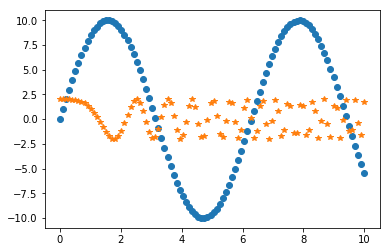

In [4]:
x = np.linspace(0, 10, 100)
fig = plt.figure()
plt.plot(x, 10* np.sin(x), 'o')
plt.plot(x, 2*np.cos(x*x), '*')
plt.savefig("Ejemplo_guardar_imagen.pdf", bbox_inches='tight')
plt.savefig("Ejemplo_guardar_imagen.jpeg", bbox_inches='tight')

Graficamos el numero de manchas solares por ano con la funcion plt.plot()

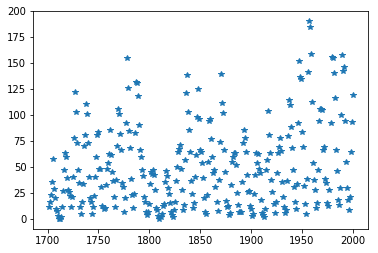

In [27]:
fig = plt.figure()
plt.plot(ano, nmanchas, '*')

## Simple Lines

Dos graficas en una sola figura

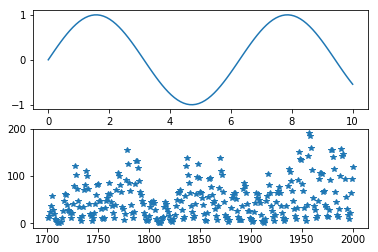

In [29]:
plt.figure() 
plt.subplot(2, 1, 1) 
plt.plot(x, np.sin(x))
 
plt.subplot(2, 1, 2)
plt.plot(ano, nmanchas, '*')

In [ ]:
Cambiando los colores:

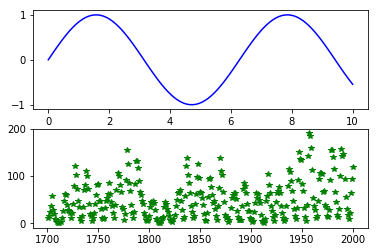

In [30]:
plt.figure() 
plt.subplot(2, 1, 1) 
plt.plot(x, np.sin(x), color='blue')
 
plt.subplot(2, 1, 2)
plt.plot(ano, nmanchas, '*', color='g')

Cambiando el tipo de linea:

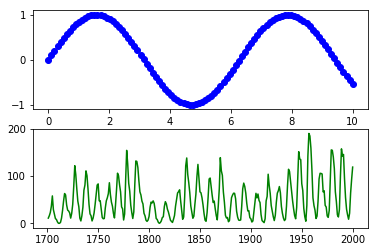

In [7]:
plt.figure() 
plt.subplot(2, 1, 1) 
plt.plot(x, np.sin(x), 'o', color='blue')
 
plt.subplot(2, 1, 2)
plt.plot(ano, nmanchas, '-', color='g')

Ajustando el rango de los ejes y poniendo etiquetas a los ejes:

Text(0,0.5,'Numero de manchas')

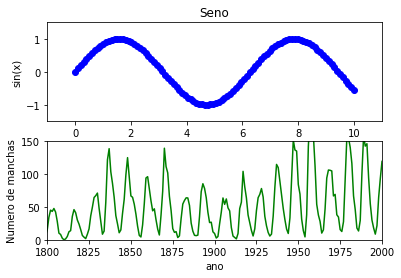

In [12]:
plt.figure() 
plt.subplot(2, 1, 1) 
plt.plot(x, np.sin(x), 'o', color='blue')
plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5)
plt.title("Seno")
plt.xlabel("x")
plt.ylabel("sin(x)")
 
plt.subplot(2, 1, 2)
plt.plot(ano, nmanchas, '-', color='g')
plt.xlim(1800, 2000)
plt.ylim(0, 150)
plt.xlabel("ano")
plt.ylabel("Numero de manchas")

## Scatter

Ejemplo de una grafica de puntos utilizando 'plt.plot'. Se usan las longitus y latitudes de las estaciones meteorologicas::

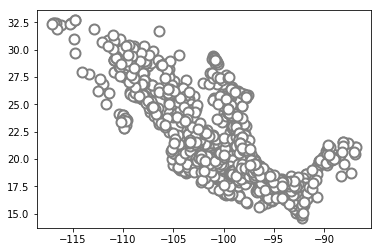

In [21]:
plt.plot(LLUVIA_2019.LON, LLUVIA_2019.LAT, 'o', color='gray', markersize=10, linewidth=4, markerfacecolor='white', markeredgecolor='gray', markeredgewidth=2)

Ejemplo de una grafica de puntos utilizando 'plt.scatter':

In [25]:
print(TMAX_2019.keys())

Index(['Lon', 'Lat', 'Clave', 'Edo', 'Est', 'Tmax'], dtype='object')


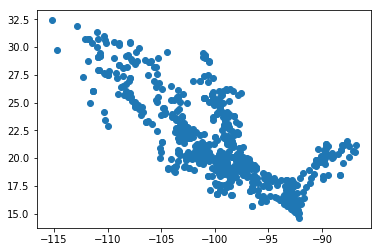

In [26]:
plt.scatter(TMAX_2019.Lon, TMAX_2019.Lat, marker='o');

Cambiando el color, tamano, y transparencia en los puntos:

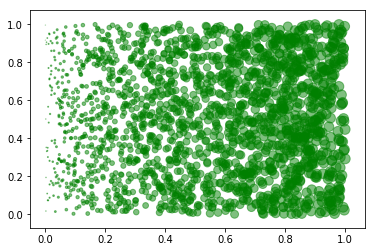

In [51]:
x = np.random.rand(1, 2000)
y = np.random.rand(1, 2000)
sizes = x*(100)
plt.scatter(x, y, color='green', s=sizes, alpha=0.5)

### Barras de error

In [53]:
print(TMAX_2019.keys())

Index(['Lon', 'Lat', 'Clave', 'Edo', 'Est', 'Tmax'], dtype='object')


In [54]:
print(LLUVIA_2019.keys())

Index(['LON', 'LAT', 'EDO', 'CLAVE_SIH', 'NOMBRE', 'ENE'], dtype='object')


Este es un ejemplo de como introducir barras de error en X y Y para la temperatura maxima de 2019 en funcion de la latitud de la estacion meteorologica.

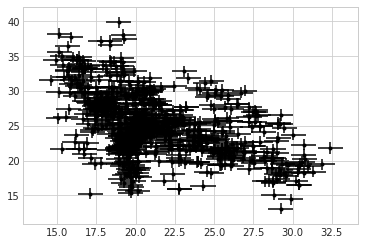

In [63]:
dy = 0.8
plt.errorbar(TMAX_2019.Lat, TMAX_2019.Tmax, yerr=dy, xerr=dy, fmt='.k');

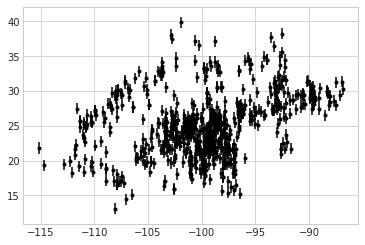

In [58]:
dy = 0.8
plt.errorbar(TMAX_2019.Lon, TMAX_2019.Tmax, yerr=dy, fmt='.k');

## Graficas de Densidad y Contornos

In [127]:
x,y = np.meshgrid(TMAX_2019.Lon, TMAX_2019.Lat)
def f(x, y):
    return x/y

z = f(x, y)

In [128]:
z

array([[-5.95167064, -6.10322196, -6.67243437, ..., -5.95107399,
        -5.6951074 , -5.21897375],
       [-4.56521739, -4.68146453, -5.1180778 , ..., -4.56475973,
        -4.36842105, -4.00320366],
       [-3.24812765, -3.33083686, -3.64148486, ..., -3.24780202,
        -3.10810811, -2.8482579 ],
       ...,
       [-5.09188361, -5.2215416 , -5.70852476, ..., -5.09137315,
        -4.87238387, -4.46503318],
       [-5.47174986, -5.61108064, -6.13439386, ..., -5.47120132,
        -5.23587493, -4.79813494],
       [-4.95529061, -5.08147044, -5.55538997, ..., -4.95479384,
        -4.74167909, -4.34525584]])

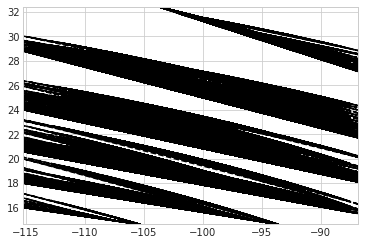

In [129]:
plt.contour(x, y, z, colors='black')

Object `for` not found.


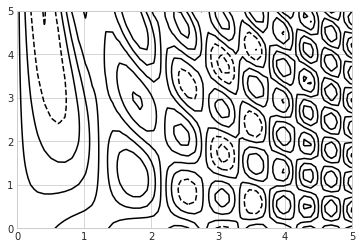

In [131]:
def f(x, y):
    return np.sin(x) ** 2 + np.cos(1+ y * x) * np.cos(x**2)
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
plt.contour(X, Y, Z, colors='black');

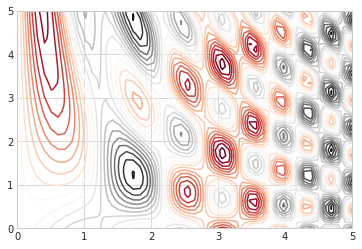

In [132]:
plt.contour(X, Y, Z, 20, cmap='RdGy');

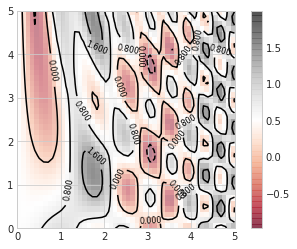

In [133]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
cmap='RdGy', alpha=0.5)
plt.colorbar();

### Histogramas, Binnings, y Densidad

Ejemplo de histograma con las temperaturas maximas de 2019,  temperaturas medias de 2019 y precipitacion en 2019

/home/luiscantero/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


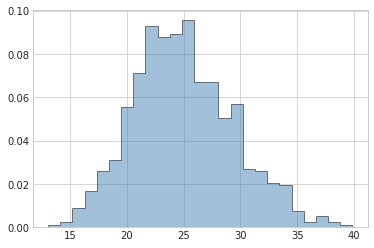

In [148]:
plt.hist(TMAX_2019.Tmax, bins=25, normed=True, alpha=0.5, histtype='stepfilled', color='steelblue',edgecolor='k')

/home/luiscantero/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


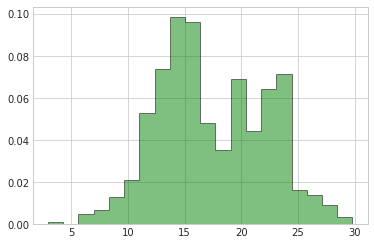

In [147]:
plt.hist(TMED_2019.Tmed, bins=20, normed=True, alpha=0.5, histtype='stepfilled', color='green', edgecolor='k')

/home/luiscantero/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


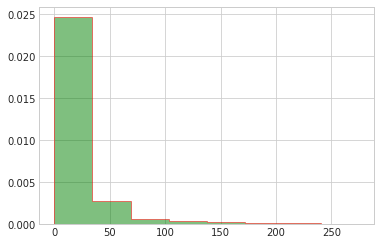

In [152]:
plt.hist(LLUVIA_2019.ENE, bins=8, normed=True, alpha=0.5,
histtype='stepfilled', color='green', edgecolor='r');

Sobreponiendo dos histogramas, temperatura maxima y media:

/home/luiscantero/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([0.00117311, 0.        , 0.00469243, 0.00703865, 0.01290419,
        0.02111595, 0.05278987, 0.07390582, 0.09854109, 0.09619487,
        0.04809744, 0.03519325, 0.06921338, 0.04457811, 0.06452095,
        0.0715596 , 0.01642351, 0.0140773 , 0.00938487, 0.00351932]),
 array([ 2.9516129 ,  4.29403226,  5.63645161,  6.97887097,  8.32129032,
         9.66370968, 11.00612903, 12.34854839, 13.69096774, 15.0333871 ,
        16.37580645, 17.71822581, 19.06064516, 20.40306452, 21.74548387,
        23.08790323, 24.43032258, 25.77274194, 27.11516129, 28.45758065,
        29.8       ]),
 <a list of 1 Patch objects>)

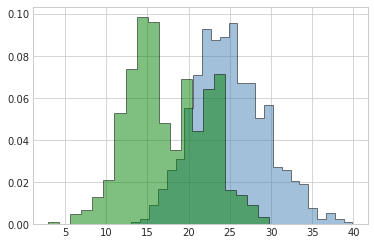

In [153]:
plt.hist(TMAX_2019.Tmax, bins=25, normed=True, alpha=0.5, histtype='stepfilled', color='steelblue',edgecolor='k')
plt.hist(TMED_2019.Tmed, bins=20, normed=True, alpha=0.5, histtype='stepfilled', color='green', edgecolor='k')

Ejemplo de grafica de bines hexagonales usando plt.hexbin() para temperatura:

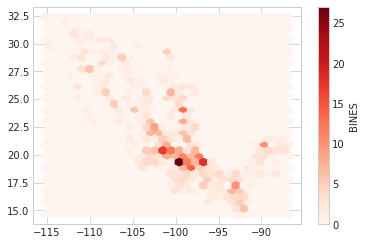

In [15]:
plt.hexbin(TMAX_2019.Lon, TMAX_2019.Lat, gridsize=30, cmap='Reds')
cb = plt.colorbar(label='BINES')

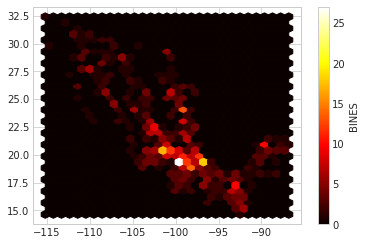

In [16]:
plt.hexbin(TMAX_2019.Lon, TMAX_2019.Lat, gridsize=30, cmap='hot')
cb = plt.colorbar(label='BINES')

Ejemplo apra lluvias:

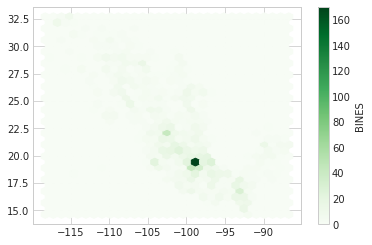

In [17]:
plt.hexbin(LLUVIA_2018.LON, LLUVIA_2018.LAT, gridsize=30, cmap='Greens')
cb = plt.colorbar(label='BINES')

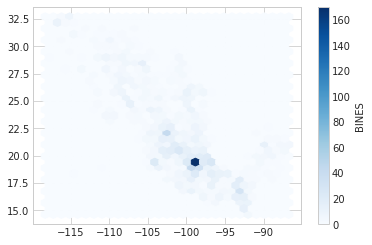

In [18]:
plt.hexbin(LLUVIA_2018.LON, LLUVIA_2018.LAT, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='BINES')

### Personalizando etiquetas de las graficas

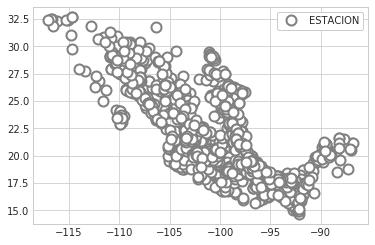

In [161]:
plt.plot(LLUVIA_2019.LON, LLUVIA_2019.LAT, 'o', color='gray', markersize=10,
linewidth=4, markerfacecolor='white', markeredgecolor='gray', markeredgewidth=2, label='ESTACION M.')

plt.legend(framealpha=1, frameon=True);

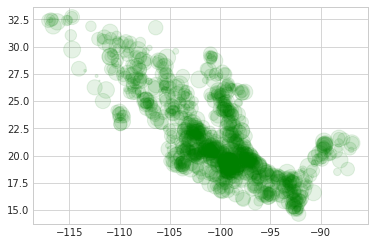

In [164]:
s = np.random.rand(1, 2000)
sizes = s*(300)
plt.scatter(LLUVIA_2019.LON, LLUVIA_2019.LAT, color='green', s=sizes, alpha=0.1)

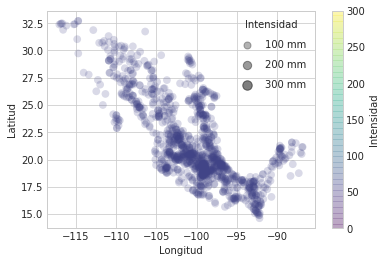

In [210]:
plt.scatter(LLUVIA_2019.LON, LLUVIA_2019.LAT, label=None, c=np.array(LLUVIA_2019.ENE/5), cmap='viridis', linewidth=0, alpha=0.2, s =LLUVIA_2019.ENE*.2 )
plt.axis(aspect='equal')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.colorbar(label='Intensidad')
plt.clim(0, 300)

plt.scatter([], [], c='k', alpha=0.3, s=50, label="100 mm")
plt.scatter([], [], c='k', alpha=0.4, s=70, label="200 mm")
plt.scatter([], [], c='k', alpha=0.5, s=90, label="300 mm")


plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Intensidad')


In [166]:
max(LLUVIA_2019.ENE)

274.7

In [167]:
min(LLUVIA_2019.ENE)

0.0

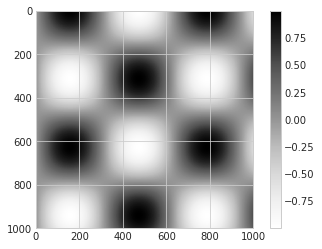

In [211]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])
plt.imshow(I)
plt.colorbar();

## Texto y anotaciones

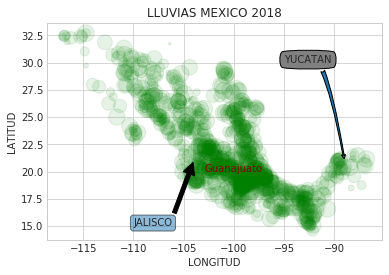

In [27]:
s = np.random.rand(1, 2000)
sizes = s*(300)
plt.scatter(LLUVIA_2019.LON, LLUVIA_2019.LAT, color='green', s=sizes, alpha=0.1)

plt.text(-100, 20, "Guanajuato", ha='center',size=10, color='darkred')

plt.annotate('JALISCO',xy=(-104,21), 
             xytext=(-110,15),bbox=dict(boxstyle="round", alpha=0.5),arrowprops=dict(facecolor='black', shrink=0.03))

plt.annotate('YUCATAN',xy=(-89,21), 
             xytext=(-95,30),bbox=dict(boxstyle="round4,pad=0.5", fc="0.5"),
            arrowprops=dict(arrowstyle="fancy",connectionstyle="angle3,angleA=45,angleB=-80"))


plt.xlabel('LONGITUD')
plt.ylabel('LATITUD')
plt.title('LLUVIAS MEXICO 2018');

## Graficas en 3 dimensiones

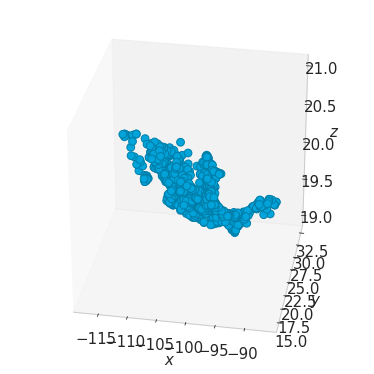

In [37]:
fig = pyplot.figure()
plt.rcParams["figure.figsize"] = (5, 5)
plt.rcParams.update({'font.size':15})
ax = Axes3D(fig)
ax.grid(False)
ax.scatter(LLUVIA_2019.LON, LLUVIA_2019.LAT, 20, color=[(0/255,164/255,219/255)], s=60, alpha = 0.99, edgecolors=[(0/255,126/255,168/255)])
ax.set_xlabel("$x$") 
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")
ax.view_init(30, 280)
